In [2]:
# Titanic Survival Prediction - Task 1

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset (make sure titanic.csv is in the same folder)
data = pd.read_csv("titanic.csv")

# Display first 5 rows
print("Dataset Preview:")
display(data.head())

# Check basic info about dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

C:\Users\ANUSHKA MISHRA\AppData\Local\Temp\ipykernel_13408\4047669519.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
C:\Users\ANUSHKA MISHRA\AppData\Local\Temp\ipykernel_13408\4047669519.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


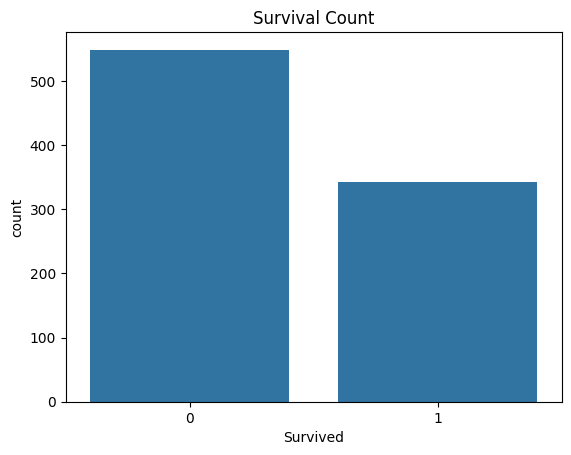

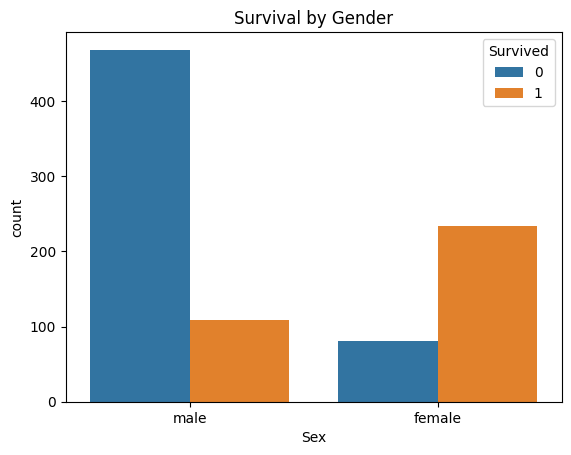

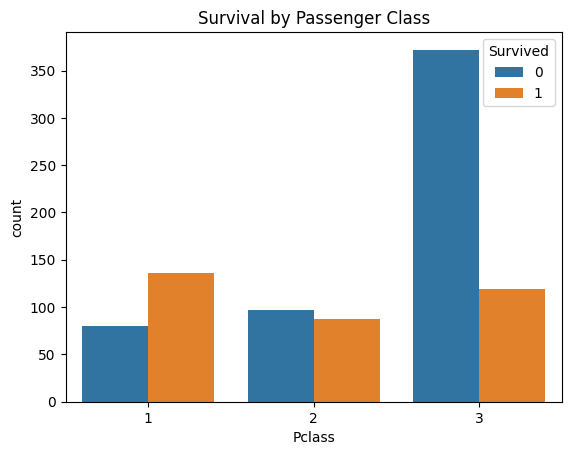

In [3]:

# Data Cleaning

# Drop unnecessary columns
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill missing Age with median
data["Age"].fillna(data["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most common value)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

# Check again for missing values
print("Missing values after cleaning:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival count
sns.countplot(x="Survived", data=data)
plt.title("Survival Count")
plt.show()

# Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Survival by Passenger Class")
plt.show()

In [4]:

# Feature Engineering

# Convert 'Sex' column to numeric (male=0, female=1)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked' using one-hot encoding
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

print("Dataset after encoding:")
display(data.head())

Dataset after encoding:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [6]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop("Survived", axis=1)
y = data["Survived"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Decision Tree Accuracy: 0.7877094972067039
Random Forest Accuracy: 0.7988826815642458


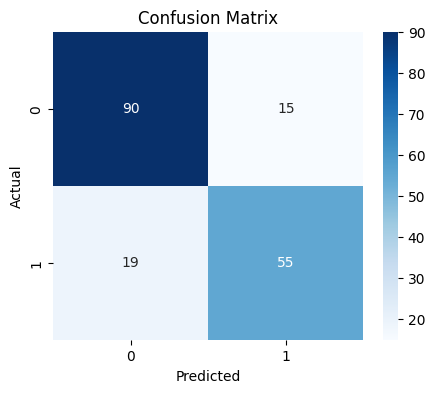

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()